In [1]:
import pandas as pd
import nltk
import textblob


In [21]:
news_data = pd.read_csv('A:/10x/10X_Acadamy/Data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')
data_fyn = pd.read_csv('A:/10x/10X_Acadamy/Data/yfinance_data/yfinance_data/AAPL_historical_data.csv')

In [22]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [23]:
data_fyn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [49]:
data_fyn['Date'] = pd.to_datetime(data_fyn['Date'], errors='coerce')
news_data['Date'] = pd.to_datetime(news_data['date'], errors='coerce')

news_data['Date'] = news_data['Date'].dt.date

news_data=news_data.dropna(subset=['Date'])

In [50]:
data_fyn

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


In [51]:
news_data

,Unnamed: 0,headline,url,publisher,date,stock,Date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22
...,...,...,...,...,...,...,...
1407266,1413787,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,2018-01-05 11:47:36-04:00,ZX,2018-01-05
1407267,1413788,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,2017-12-06 09:12:01-04:00,ZX,2017-12-06
1407268,1413789,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,2017-12-06 07:04:31-04:00,ZX,2017-12-06
1407269,1413790,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,2017-11-15 06:04:52-04:00,ZX,2017-11-15


In [52]:
news_data['Date']

0          2020-06-05
1          2020-06-03
2          2020-05-26
3          2020-05-22
4          2020-05-22
              ...    
1407266    2018-01-05
1407267    2017-12-06
1407268    2017-12-06
1407269    2017-11-15
1407270    2017-11-14
Name: Date, Length: 55987, dtype: object

## Sentimental ANalysis

In [54]:
from textblob import TextBlob

news_data['Sentiment'] = news_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5400\962846960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['Sentiment'] = news_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [56]:
news_data.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,Date,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,2020-05-22,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,2020-05-22,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,2020-05-22,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,2020-05-22,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,2020-05-22,0.00


In [57]:
#Calculate Daily Returns:

data_fyn['daily_return'] = data_fyn['Close'].pct_change()

In [58]:
data_fyn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,-0.052171
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,-0.073398
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.024751
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.028992


In [60]:
#Correlation Analysis
#Analyze the correlation between news sentiment and stock returns.
#Aggregate Daily Sentiments:

daily_sentiment = news_data.groupby('Date')['Sentiment'].mean()

In [66]:
#Calculate Correlation:

data_fyn['Date'] = pd.to_datetime(data_fyn['Date'])
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)
# Merging on The Date
merged_df = pd.merge(data_fyn, daily_sentiment, on='Date', how='inner')

In [67]:
## Calculate the correlation
correlation = merged_df['daily_return'].corr(merged_df['Sentiment'])
print(f"Correlation between Sentiment and Stock Returns: {correlation}")

Correlation between Sentiment and Stock Returns: -0.00203280647765826


## Corrlation Using Heat map

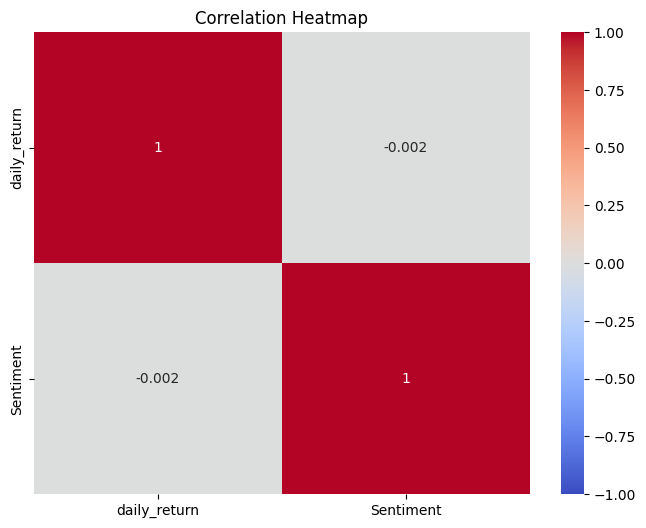

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = merged_df[['daily_return', 'Sentiment']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()